# Pm 2.5 Time Series Forecasting

In [15]:
import pandas as pd   
from pandas.plotting import register_matplotlib_converters
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
import itertools
from pandas import DataFrame
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [9]:
data = pd.read_csv('E:/College/Analytics/Python/PM2.5.csv')

In [10]:
data['Timestamp'] = data['year'].map(str) + "/" + data['month'].map(str) + "/" + data['day'].map(str) + ' ' 
+data['hour'].map(str) + ":" + "00:00"
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [11]:
data = data.set_index('Timestamp')

In [12]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
Timestamp,,,,,,,,,,,,,
2010-01-01,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [13]:
data.shape

(43824, 13)

In [14]:
# Drop unwanted Columns
data = data.drop(['No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], axis=1)

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.6195e+04, 1.0214e+04, 3.5510e+03, 1.2260e+03, 4.4100e+02,
        9.7000e+01, 1.5000e+01, 7.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([  0. ,  99.4, 198.8, 298.2, 397.6, 497. , 596.4, 695.8, 795.2,
        894.6, 994. ]),
 <a list of 10 Patch objects>)

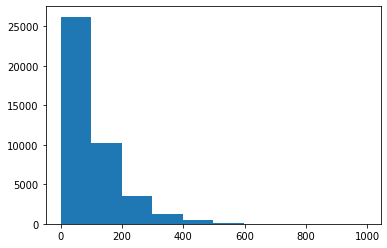

In [17]:
plt.hist(data['pm2.5'])

In [18]:
data.fillna(data.mean(), inplace = True)

###  Exploratory Data Analysis (EDA)

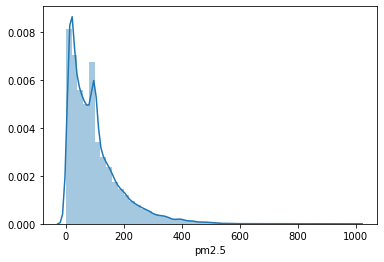

In [20]:
sns.distplot(data['pm2.5'])

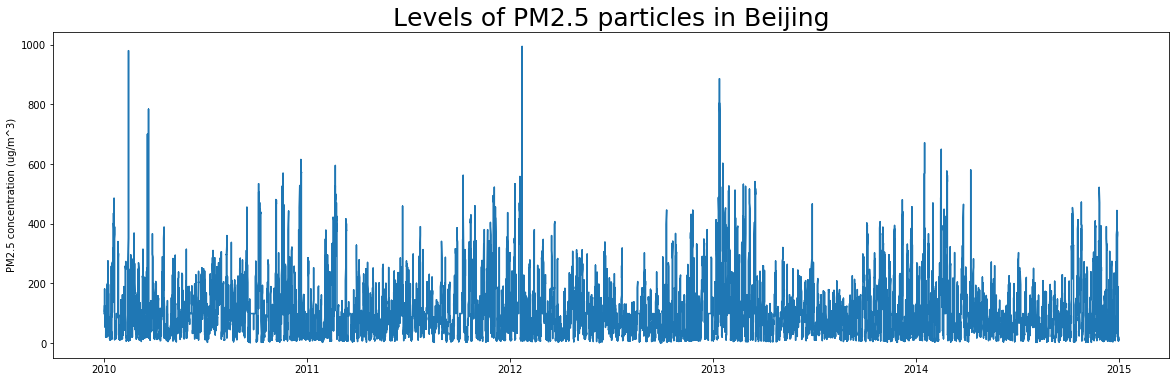

In [27]:
register_matplotlib_converters()
plt.figure(figsize=(20,6))
plt.plot(data.index, data['pm2.5'])
plt.title("Levels of PM2.5 particles in Beijing", fontsize =25)
plt.ylabel("PM2.5 concentration (ug/m^3)")
plt.show()

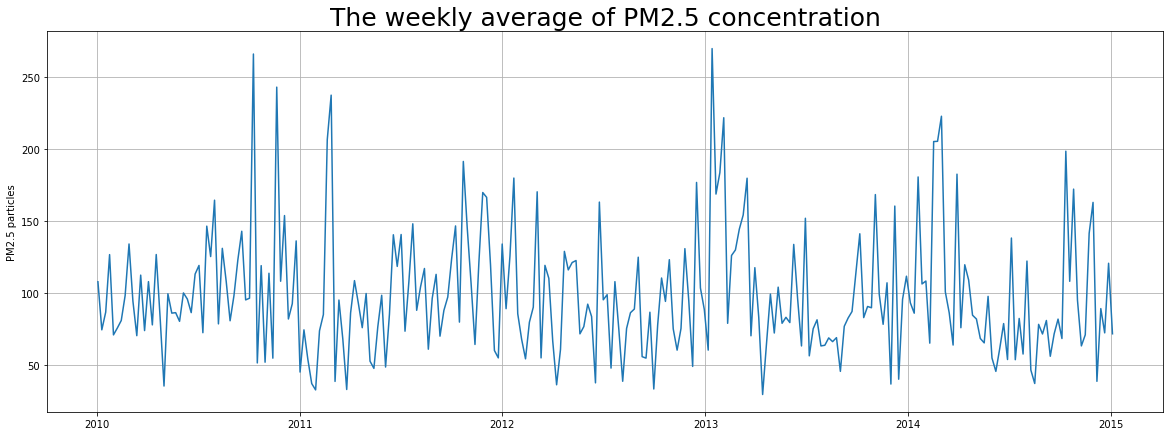

In [29]:
weekly = data['pm2.5'].resample('W').mean()
plt.figure(figsize=(20,7))
plt.plot(weekly)
plt.title("The weekly average of PM2.5 concentration", fontsize =25)
plt.ylabel("PM2.5 particles")
plt.grid()
plt.show()

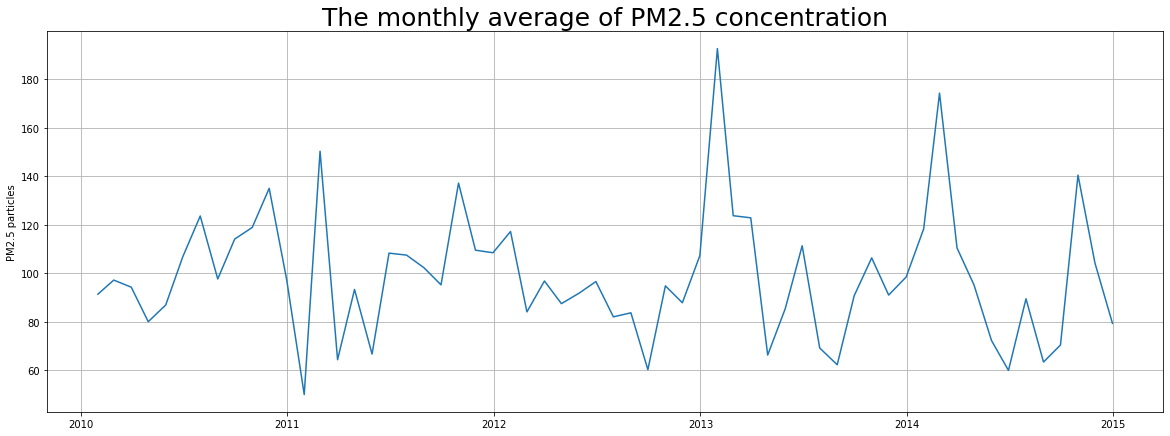

In [30]:
monthly = data['pm2.5'].resample('M').mean()
plt.figure(figsize=(20,7))
plt.plot(monthly)
plt.title("The monthly average of PM2.5 concentration",fontsize=25)
plt.ylabel("PM2.5 particles")
plt.grid()
plt.show()

### Moving Average

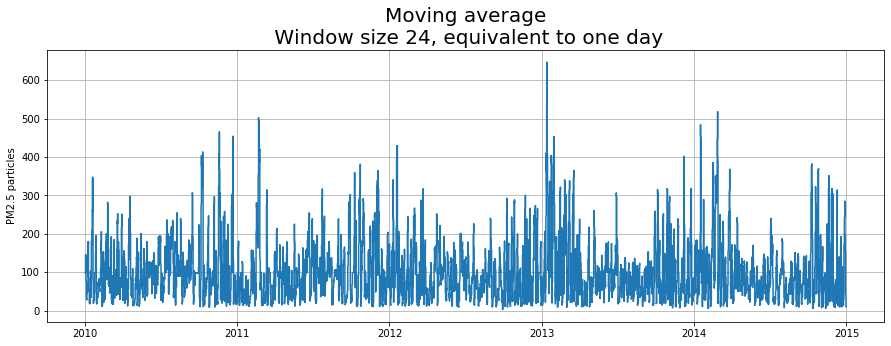

In [32]:
movingAverage = data['pm2.5'].rolling(window=24).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n Window size 24, equivalent to one day", fontsize=20)
plt.ylabel("PM2.5 particles")
plt.plot(movingAverage,label="Rolling mean trend")

plt.grid(True)

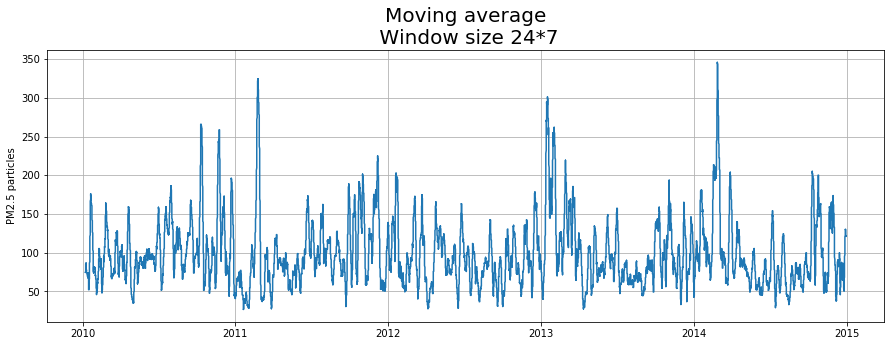

In [33]:
movingAverage = data['pm2.5'].rolling(window=(24*7)).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n Window size 24*7", fontsize=20)
plt.ylabel("PM2.5 particles")
plt.plot(movingAverage,label="Rolling mean trend")

plt.grid(True)

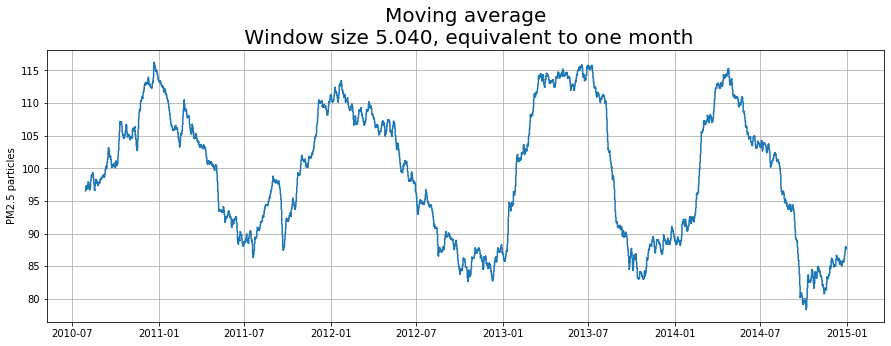

In [34]:
movingAverage = data['pm2.5'].rolling(window=(24*7*30)).mean()

plt.figure(figsize=(15,5))
plt.title("Moving average\n Window size 5.040, equivalent to one month", fontsize=20)
plt.plot(movingAverage,label="Rolling mean trend")
plt.ylabel("PM2.5 particles")
plt.grid(True)
plt.show()

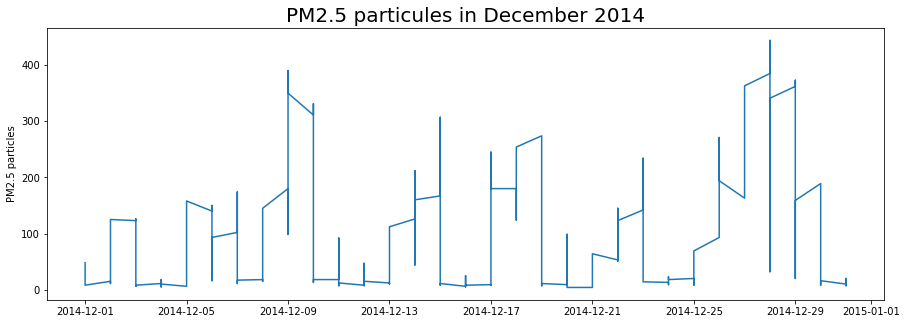

In [38]:
last_weeks = data.loc['2014-12':'2014']
plt.figure(figsize=(15,5))
plt.title("PM2.5 particules in December 2014",fontsize=20)
plt.ylabel("PM2.5 particles")
plt.plot(last_weeks)

In [39]:
train_dataset = last_weeks['2014-12': '2014-12-29']
test_dataset = last_weeks['2014-12-30': '2014']

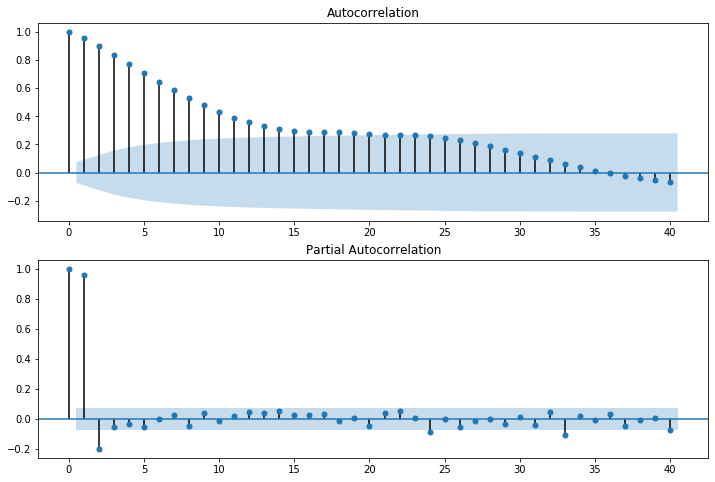

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_dataset['pm2.5'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_dataset['pm2.5'], lags=40, ax=ax2)

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_dataset, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  pm2.5   No. Observations:                  696
Model:                     ARMA(3, 0)   Log Likelihood               -3272.849
Method:                       css-mle   S.D. of innovations             26.618
Date:                Sat, 26 Oct 2019   AIC                           6555.699
Time:                        03:38:10   BIC                           6578.426
Sample:                             0   HQIC                          6564.487
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          83.7866     18.022      4.649      0.000      48.464     119.109
ar.L1.pm2.5     1.1317      0.038     29.949      0.000       1.058       1.206
ar.L2.pm2.5    -0.1277      0.057     -2.239    

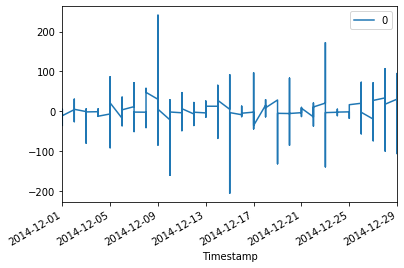

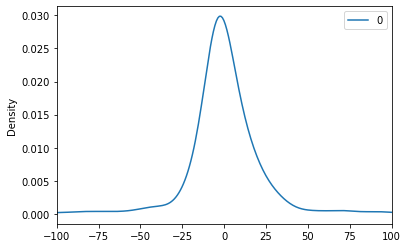

In [44]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.xlim([-100.0, 100.0])
plt.show()

In [45]:
test = test_dataset.values

X = train_dataset.values
size = len(X)
history = [x for x in X]

predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

predicted=156.056101, expected=189.000000
predicted=188.563222, expected=97.000000
predicted=81.442274, expected=81.000000
predicted=72.297310, expected=28.000000
predicted=20.258036, expected=25.000000
predicted=23.851181, expected=9.000000
predicted=9.964423, expected=9.000000
predicted=11.902951, expected=13.000000
predicted=17.571253, expected=17.000000
predicted=21.636452, expected=16.000000
predicted=19.776527, expected=25.000000
predicted=29.720333, expected=48.000000
predicted=54.720044, expected=49.000000
predicted=52.692099, expected=73.000000
predicted=77.911376, expected=65.000000
predicted=66.272581, expected=55.000000
predicted=54.095491, expected=60.000000
predicted=61.379456, expected=63.000000
predicted=64.952112, expected=79.000000
predicted=82.261831, expected=35.000000
predicted=30.888701, expected=26.000000
predicted=24.252731, expected=20.000000
predicted=21.684583, expected=8.000000
predicted=9.480486, expected=16.000000
predicted=20.187574, expected=10.000000
pr

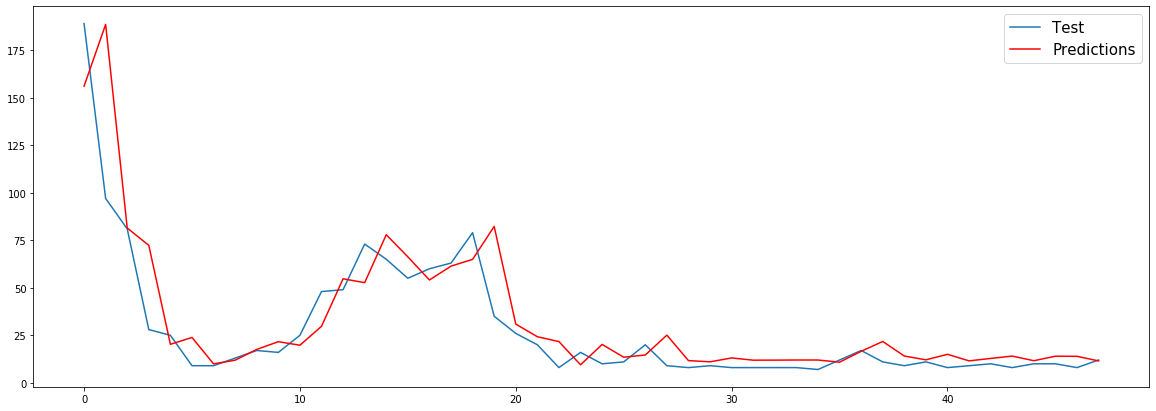

In [46]:
plt.figure(figsize=(20,7))
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.legend(prop={'size': 15})
plt.show()

In [52]:
error

340.83026364613085

In [53]:
err = mean_squared_error(test, predictions)
print('Test Mean Squared Error(MSE): %.3f' % err)

Test Mean Squared Error(MSE): 340.830
